In [16]:
# import library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
import nltk

# Download NLTK resources
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Yoni\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yoni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yoni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yoni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
#Loading and Previewing Data
import os

# File path
data_path = r"D:\Kifya_training\Week 1\Technical  Content\Data\raw_analyst_ratings.csv"

# Check if file exists
if not os.path.exists(data_path):
    raise FileNotFoundError(f"The file at {data_path} does not exist.")

# Load dataset
df = pd.read_csv(data_path)

# Preview the dataset
print("Dataset Loaded Successfully!")
print("Columns in Dataset:", df.columns)
print("Data Types:")
print(df.dtypes)
df.head()



Dataset Loaded Successfully!
Columns in Dataset: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')
Data Types:
Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [19]:

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Handle missing or null values in the 'headline' column
df['headline'] = df['headline'].fillna("")

# Compute sentiment polarity using VADER
df['sentiment_score'] = df['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize sentiment
def categorize_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

# Display results
print("Sentiment Analysis Completed!")
print(df[['headline', 'sentiment_score', 'sentiment_category']].head())



Sentiment Analysis Completed!
                                            headline  sentiment_score  \
0            Stocks That Hit 52-Week Highs On Friday            0.000   
1         Stocks That Hit 52-Week Highs On Wednesday            0.000   
2                      71 Biggest Movers From Friday            0.000   
3       46 Stocks Moving In Friday's Mid-Day Session            0.000   
4  B of A Securities Maintains Neutral on Agilent...            0.296   

  sentiment_category  
0            Neutral  
1            Neutral  
2            Neutral  
3            Neutral  
4           Positive  


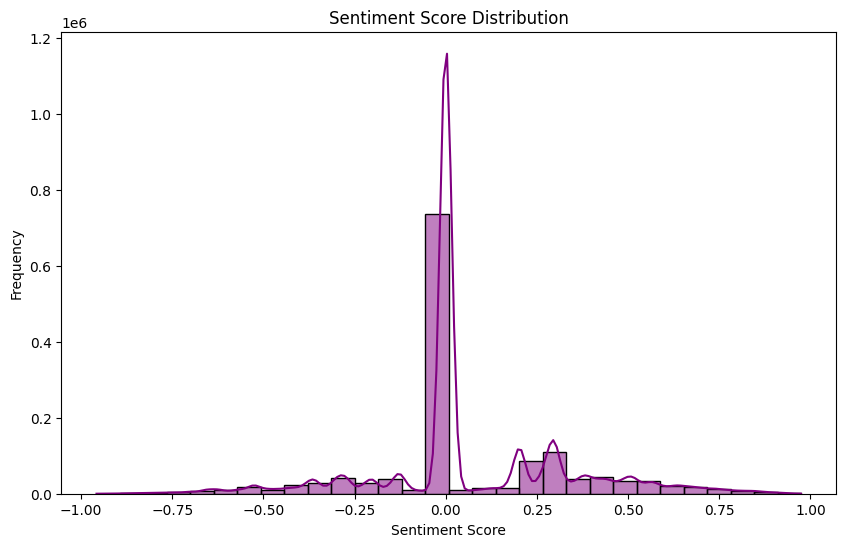

C:\Users\Yoni\AppData\Local\Temp\ipykernel_17308\1964271080.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_category', palette='viridis')


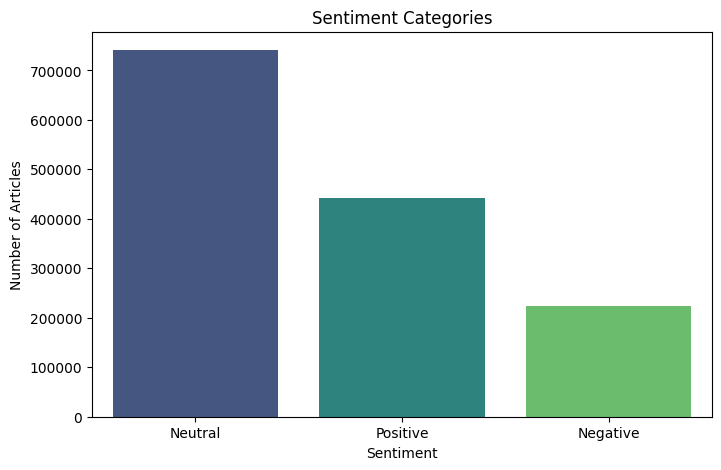

In [20]:

# Plot sentiment score distribution
if not df['sentiment_score'].empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['sentiment_score'], kde=True, bins=30, color='purple')
    plt.title("Sentiment Score Distribution")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No sentiment scores available to plot.")

# Plot sentiment categories
if not df['sentiment_category'].empty:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='sentiment_category', palette='viridis')
    plt.title("Sentiment Categories")
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Articles")
    plt.show()
else:
    print("No sentiment categories available to plot.")


In [22]:
# Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    try:
        # Ensure text is a string
        if not isinstance(text, str):
            return ""

        # Tokenization and lowercasing
        tokens = nltk.word_tokenize(text.lower())
        
        # Remove stopwords and non-alphabetic tokens
        filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
        
        return " ".join(filtered_tokens)
    except Exception as e:
        print(f"Error during preprocessing: {e}")
        return ""

# Apply preprocessing
df['cleaned_text'] = df['headline'].fillna("").apply(preprocess_text)

# Display some preprocessed data
print("Text Preprocessing Completed!")
print(df[['headline', 'cleaned_text']].head())

Text Preprocessing Completed!
                                            headline  \
0            Stocks That Hit 52-Week Highs On Friday   
1         Stocks That Hit 52-Week Highs On Wednesday   
2                      71 Biggest Movers From Friday   
3       46 Stocks Moving In Friday's Mid-Day Session   
4  B of A Securities Maintains Neutral on Agilent...   

                                        cleaned_text  
0                              stock hit high friday  
1                           stock hit high wednesday  
2                               biggest mover friday  
3                        stock moving friday session  
4  b security maintains neutral agilent technolog...  


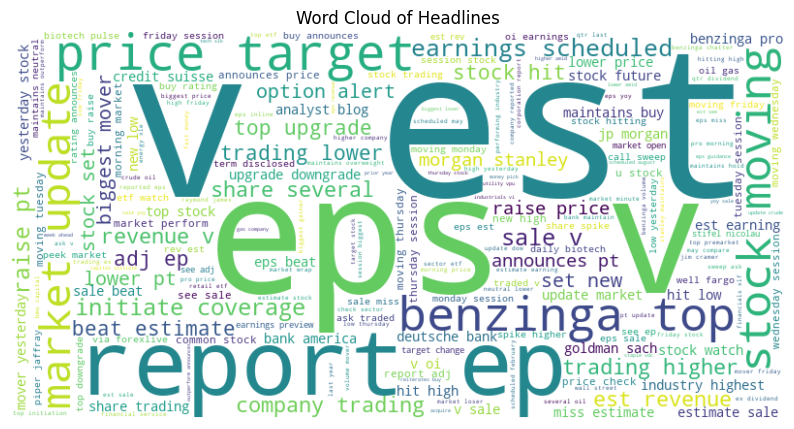

In [23]:
#  Word Cloud Visualization
# Combine all cleaned text into a single string
text = " ".join(df['cleaned_text'])

if text.strip():
    # Generate Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display Word Cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Headlines")
    plt.show()
else:
    print("No cleaned text available for Word Cloud visualization.")


In [24]:
#TF-IDF Vectorization
if not df['cleaned_text'].empty:
    # Initialize TF-IDF Vectorizer
    tfidf = TfidfVectorizer(max_features=100, stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['cleaned_text'])
    
    # Get feature names
    feature_names = tfidf.get_feature_names_out()
    
    # Display results
    print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")
    print("Top TF-IDF Features:", feature_names[:10])
else:
    print("No cleaned text available for TF-IDF vectorization.")

TF-IDF Matrix Shape: (1407328, 100)
Top TF-IDF Features: ['adj' 'ahead' 'alert' 'america' 'amid' 'analyst' 'announces' 'august'
 'bank' 'beat']


In [25]:
# Topic Modeling (LDA)
from sklearn.decomposition import LatentDirichletAllocation

if tfidf_matrix.shape[0] > 0:
    # Initialize LDA
    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(tfidf_matrix)
    
    # Display top words in each topic
    print("LDA Topic Modeling Results:")
    for i, topic in enumerate(lda.components_):
        top_words = [feature_names[j] for j in topic.argsort()[-10:]]
        print(f"Topic {i+1}: {', '.join(top_words)}")
else:
    print("TF-IDF matrix is empty. Skipping LDA topic modeling.")


LDA Topic Modeling Results:
Topic 1: result, market, option, lower, higher, target, trading, company, price, share
Topic 2: ceo, data, tuesday, news, week, beat, estimate, moving, session, stock
Topic 3: capital, raise, bank, update, market, pt, benzinga, buy, upgrade, downgrade
Topic 4: analyst, watch, industry, high, scheduled, announces, new, etf, stock, earnings
Topic 5: year, biggest, adj, mover, revenue, say, sale, eps, est, report


In [26]:
# Sentiment Analysis
from textblob import TextBlob

def compute_sentiment(text):
    try:
        # Handle empty or invalid text
        if not isinstance(text, str) or text.strip() == "":
            return 0.0  # Neutral sentiment
        
        # Calculate polarity
        return TextBlob(text).sentiment.polarity
    except Exception as e:
        print(f"Error computing sentiment: {e}")
        return 0.0  # Default to neutral sentiment

# Compute sentiment polarity
df['sentiment'] = df['cleaned_text'].apply(compute_sentiment)

# Classify sentiment
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Display results
print("Sentiment Analysis Completed!")
print(df[['cleaned_text', 'sentiment', 'sentiment_label']].head())

# Sentiment summary
sentiment_counts = df['sentiment_label'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_counts)


Sentiment Analysis Completed!
                                        cleaned_text  sentiment  \
0                              stock hit high friday       0.16   
1                           stock hit high wednesday       0.16   
2                               biggest mover friday       0.00   
3                        stock moving friday session       0.00   
4  b security maintains neutral agilent technolog...       0.00   

  sentiment_label  
0        positive  
1        positive  
2         neutral  
3         neutral  
4         neutral  

Sentiment Distribution:
sentiment_label
neutral     958673
positive    343782
negative    104873
Name: count, dtype: int64


In [27]:
#Saving Outputs

output_file = 'preprocessed_financial_news.csv'

try:
    # Save DataFrame to CSV
    df.to_csv(output_file, index=False)
    print(f"Preprocessed data successfully saved to '{output_file}'.")
except Exception as e:
    print(f"Error saving data: {e}")


Preprocessed data successfully saved to 'preprocessed_financial_news.csv'.


C:\Users\Yoni\AppData\Local\Temp\ipykernel_17308\3168375719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='viridis')


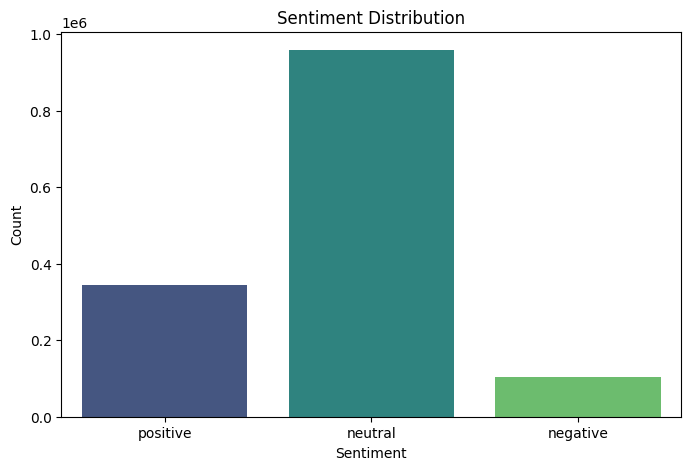

In [28]:
#Building Insights

if not df.empty and 'sentiment_label' in df.columns:
    # Plot sentiment distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(x='sentiment_label', data=df, palette='viridis')
    plt.title("Sentiment Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()
else:
    print("No data available for sentiment visualization.")



In [29]:
#Conclusion
print("Analysis Summary:")
print(f"Total Headlines Analyzed: {len(df)}")
print(f"Positive Sentiments: {sentiment_counts.get('positive', 0)}")
print(f"Neutral Sentiments: {sentiment_counts.get('neutral', 0)}")
print(f"Negative Sentiments: {sentiment_counts.get('negative', 0)}")
print("\nFurther actions:")
print("- Use this sentiment analysis to gauge market mood.")
print("- Explore more advanced modeling for classification.")
print("- Perform trend analysis by aggregating results over time.")


Analysis Summary:
Total Headlines Analyzed: 1407328
Positive Sentiments: 343782
Neutral Sentiments: 958673
Negative Sentiments: 104873

Further actions:
- Use this sentiment analysis to gauge market mood.
- Explore more advanced modeling for classification.
- Perform trend analysis by aggregating results over time.
